In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

kode diatas digunakan untuk import library.

kode dibawah digunakan untuk inisialisasi gambar dan menampilkannya

(np.float64(-0.5), np.float64(2721.5), np.float64(1293.5), np.float64(-0.5))

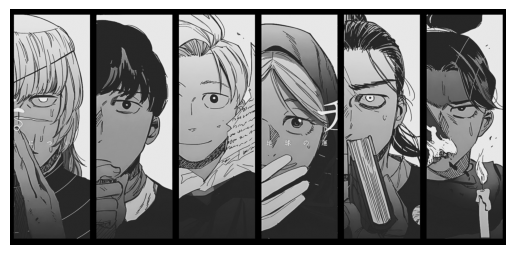

In [39]:
aktivis = cv2.imread('aktivis.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(aktivis, cmap='gray')
plt.axis('off')

Kode di bawah ini berfungsi untuk melakukan ekualisasi histogram pada sebuah citra grayscale. Di awal fungsi, dicek apakah parameter image bernilai None sebagai bentuk validasi. Jika citra tidak tersedia, maka fungsi akan mengeluarkan pesan dan berhenti. Setelah itu, ukuran gambar diambil untuk mendapatkan jumlah total piksel. Histogram citra dihitung dengan menelusuri setiap piksel dan mencatat seberapa sering setiap nilai intensitas (0 hingga 255) muncul. Berdasarkan histogram ini, dihitung PDF (Probability Density Function), yaitu probabilitas kemunculan setiap tingkat intensitas terhadap total piksel. Langkah selanjutnya adalah membentuk CDF (Cumulative Distribution Function) dengan menjumlahkan nilai-nilai PDF secara kumulatif. CDF tersebut kemudian dinormalisasi dan dikalikan 255 untuk membentuk peta transformasi atau mapping intensitas baru yang merata. Mapping tersebut diterapkan ke seluruh piksel dalam citra, menghasilkan gambar baru dengan distribusi intensitas yang telah diekualisasi. Kemudian menghitung histogram dari kedua citra asli dan citra setelah diekualisasi. Pertama, ukuran citra diambil dengan mengakses atribut .shape, yang kemudian disimpan ke dalam variabel height dan width serta height2 dan width2. Sebuah array hist dengan panjang 256 diinisialisasi dengan nilai nol untuk mewakili jumlah kemunculan tiap nilai intensitas piksel dari 0 hingga 255. Selanjutnya, dilakukan dua perulangan bersarang untuk menelusuri setiap piksel pada gambar. Setiap kali sebuah nilai intensitas ditemukan, nilainya digunakan sebagai indeks untuk menambah satu ke dalam array histogram, sehingga menghasilkan jumlah frekuensi kemunculan masing-masing tingkat intensitas. Setelah itu hasil dari semua proses tersebut ditampilkan.

Nilai intensitas dari histogram citra setelah ekualisasi lebih merata dibandingkan histogram citra asli.

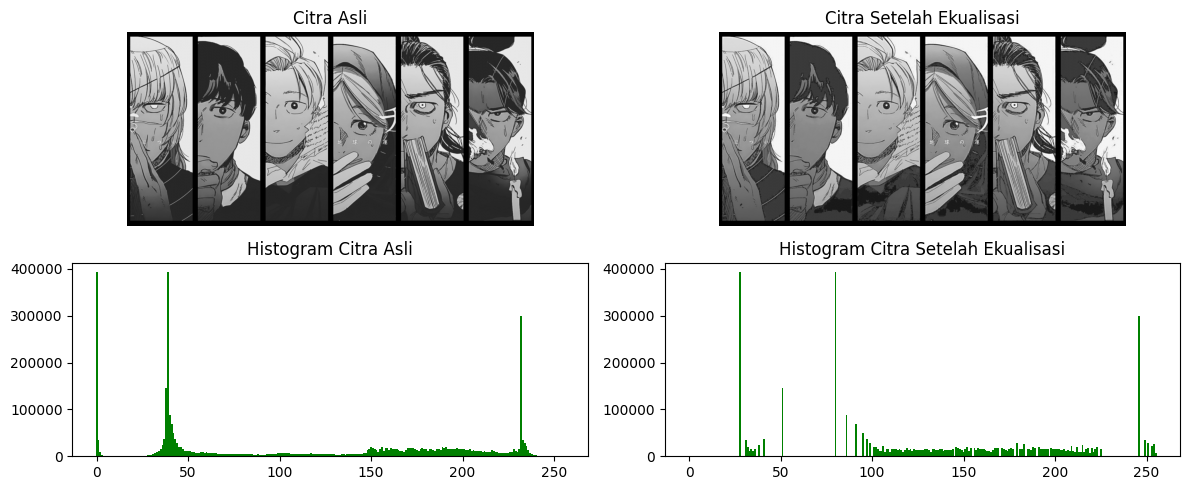

In [40]:
def ekualisasi(image):
    
    if image is None:
        print("Gambar tidak ditemukan.")
        return
    
    tinggi, lebar = image.shape
    totalPixels = tinggi * lebar

    histogram = np.zeros(256, dtype=int)
    for i in range(tinggi):
        for j in range(lebar):
            intensitas = image[i][j]
            histogram[intensitas] += 1

    pdf = [histogram[i] / totalPixels for i in range(256)]

    cdf = [0] * 256
    total = 0
    for i in range(256):
        total += pdf[i]
        cdf[i] = total

    mapping = [round(cdf[i] * 255) for i in range(256)]

    hasil = np.zeros_like(image)
    for i in range(tinggi):
        for j in range(lebar):
            hasil[i][j] = mapping[image[i][j]]

    height = image.shape[0]
    width = image.shape[1]
    hist = np.zeros(256, dtype=int)
    for i in range(height):
        for j in range(width):
            intensity = image[i][j]
            hist[intensity] += 1

    height2 = hasil.shape[0]
    width2 = hasil.shape[1]
    hist2 = np.zeros(256, dtype=int)
    for i in range(height2):
        for j in range(width2):
            intensity = hasil[i][j]
            hist2[intensity] += 1

    plt.figure(figsize=(12, 5))

    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Citra Asli')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(hasil, cmap='gray')
    plt.title('Citra Setelah Ekualisasi')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.bar([i for i in range(256)], hist, width=1.0, color='green')
    plt.title('Histogram Citra Asli')

    plt.subplot(2, 2, 4)
    plt.bar([i for i in range(256)], hist2, width=1.0, color='green')
    plt.title('Histogram Citra Setelah Ekualisasi')

    plt.tight_layout()
    plt.show()

hasil = ekualisasi(aktivis)

In [ ]:
def spesifikasi(imageAsal, imageTarget):
    height, width = imageAsal.shape
    totalPixelsAsal = height * width

    height2, width2 = imageTarget.shape
    totalPixelsTarget = height2 * width2

    histAsal = np.zeros(256, dtype=int)
    for i in range(height):
        for j in range(width):
            histAsal[imageAsal[i][j]] += 1

    histTarget = np.zeros(256, dtype=int)
    for i in range(height2):
        for j in range(width2):
            histTarget[imageTarget[i][j]] += 1

    pdfAsal = [h / totalPixelsAsal for h in histAsal]
    pdfTarget = [h / totalPixelsTarget for h in histTarget]

    cdfAsal = [0] * 256
    cdfTarget = [0] * 256
    totalAwal, totalTarget = 0, 0
    for i in range(256):
        totalAwal += pdfAsal[i]
        totalTarget += pdfTarget[i]
        cdfAsal[i] = totalAwal
        cdfTarget[i] = totalTarget